In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import statsmodels.api as sm

In [61]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [62]:
df = pd.read_csv(r'kc_house_data.csv', encoding='utf-8')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Все поля заполнены - класс!!!

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
train_data = df.drop(['id'], axis = 1)

In [66]:
train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Установим стиль графиков для улучшения восприятия

In [67]:
sns.set(style="ticks")

посмотрим как кореллируют между собой те или иные данные

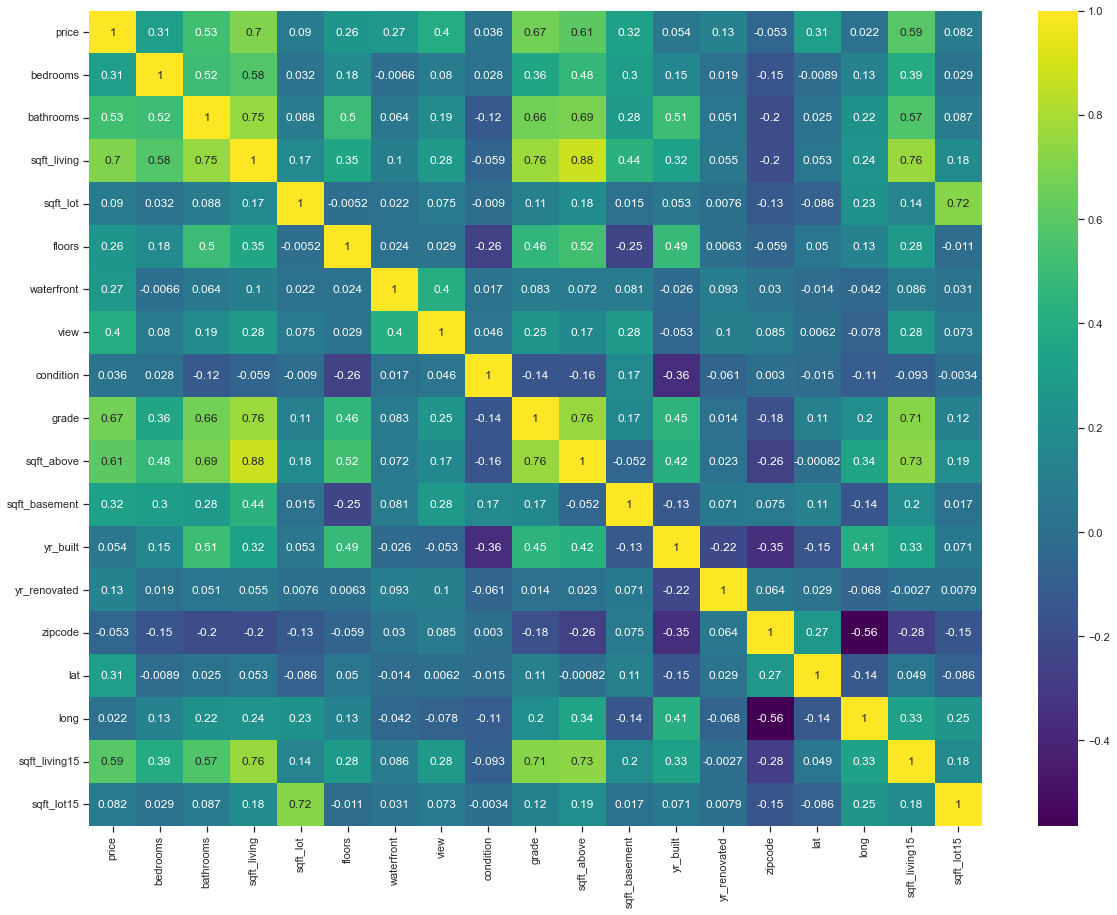

In [68]:
cor = train_data.corr()
plt.figure(figsize= (20,15))
sns.heatmap(cor,cmap = 'viridis', annot = True)
plt.show()

In [69]:
train_data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

# Предобработка данных

In [70]:
train_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Проверка на логические ошибке в датасете

In [71]:
train_data[(train_data.yr_built > train_data.yr_renovated) & (train_data.yr_renovated != 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


C:\Users\Алексей\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

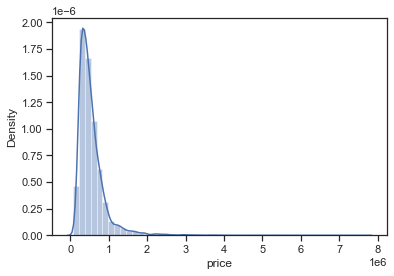

In [72]:
sns.distplot(train_data['price'])

Очень похоже на нормальное распределение, только очень большой хвост справа

In [73]:
len(train_data) #Количество строк в датафрейме
len(train_data)*0.01 #1% от количества строк

216.13

In [74]:
train_data = train_data.sort_values(['price'], ascending = False).iloc[216:]

Удалил 1% строк с наибольшей ценой. Посмотрим теперь на график

C:\Users\Алексей\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

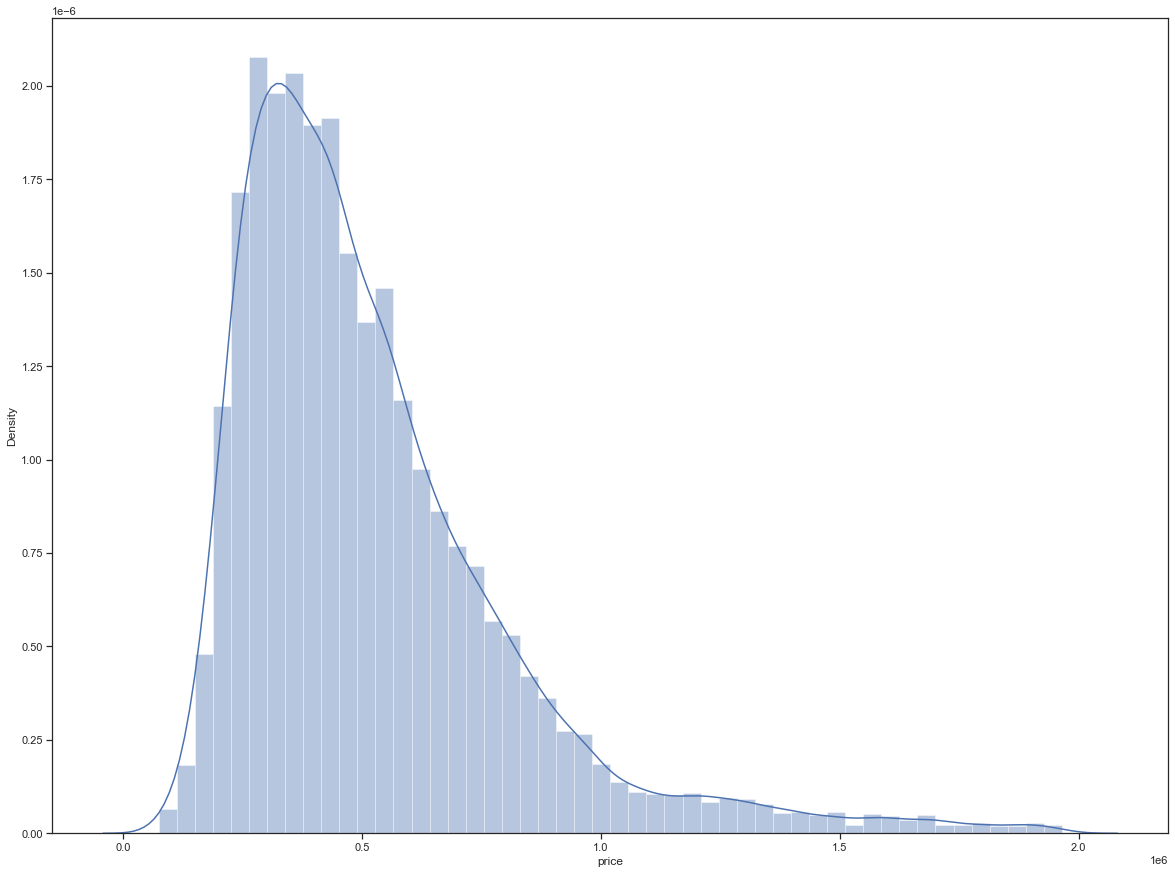

In [75]:
plt.figure(figsize= (20,15))
sns.distplot(train_data['price'])

Это больше похоже на нормальное распределение

In [76]:
train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139700e+04,21397.000000,21397.000000,21397.000000,2.139700e+04,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000
mean,5.181830e+05,3.360985,2.097537,2050.579707,1.499318e+04,1.490513,0.005328,0.216385,3.408282,7.626303,1766.311866,284.267841,1970.988316,82.267748,98078.079871,47.559461,-122.213655,1971.626677,12696.738842
std,2.847527e+05,0.923908,0.746989,861.483593,4.097853e+04,0.539242,0.072799,0.729494,0.649548,1.135392,791.713655,430.395339,29.307017,396.784910,53.471510,0.139047,0.141223,668.086144,27203.128770
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469100,-122.329000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.576000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.055000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10022.000000
max,1.965000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


Заменим дату ремонта, на время с последнего ремонта

In [77]:
train_data.loc[train_data['yr_renovated']==0, ['yr_renovated']] = train_data['yr_built']
train_data['old'] = train_data['date'].str[0:4].map(int) - train_data.yr_built
train_data['year_from_last_renovation'] = train_data['yr_renovated'] - train_data['yr_built']

In [78]:
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,old,year_from_last_renovation
3281,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,3940,0,1951,1951,98004,47.6203,-122.212,2370,13320,64,0
12577,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,1998,98005,47.6422,-122.157,3900,35237,17,0
12283,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,1988,98040,47.5632,-122.215,3700,14486,26,0
1152,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,1963,98034,47.7165,-122.259,2630,13868,52,0
9175,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,1960,98040,47.5287,-122.220,3730,16560,55,0


Удалим колонки "года ремонта",

In [79]:
train_data = train_data.drop(['yr_renovated', 'date'], axis = 1)

Переименуем новую колонку во что-то более короткое

In [80]:
train_data = train_data.rename(columns={'year_from_last_renovation':'yr_fm_lst_ren'})

# Обучение моделей

In [81]:
x_data = train_data.drop(columns = ['price'])
y_data = train_data['price']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [83]:
x_train, x_test, y_train, y_test =\
train_test_split(x_data, y_data, test_size=0.33, random_state=42)

# Линейная регрессия

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [85]:
print(f'R² score: {r2_score(y_train, lin_reg.predict(x_train))*100}')

R² score: 71.51145212761352


In [86]:
print(f'R² score: {r2_score(y_test, lin_reg.predict(x_test))*100}')

R² score: 71.83414743909569


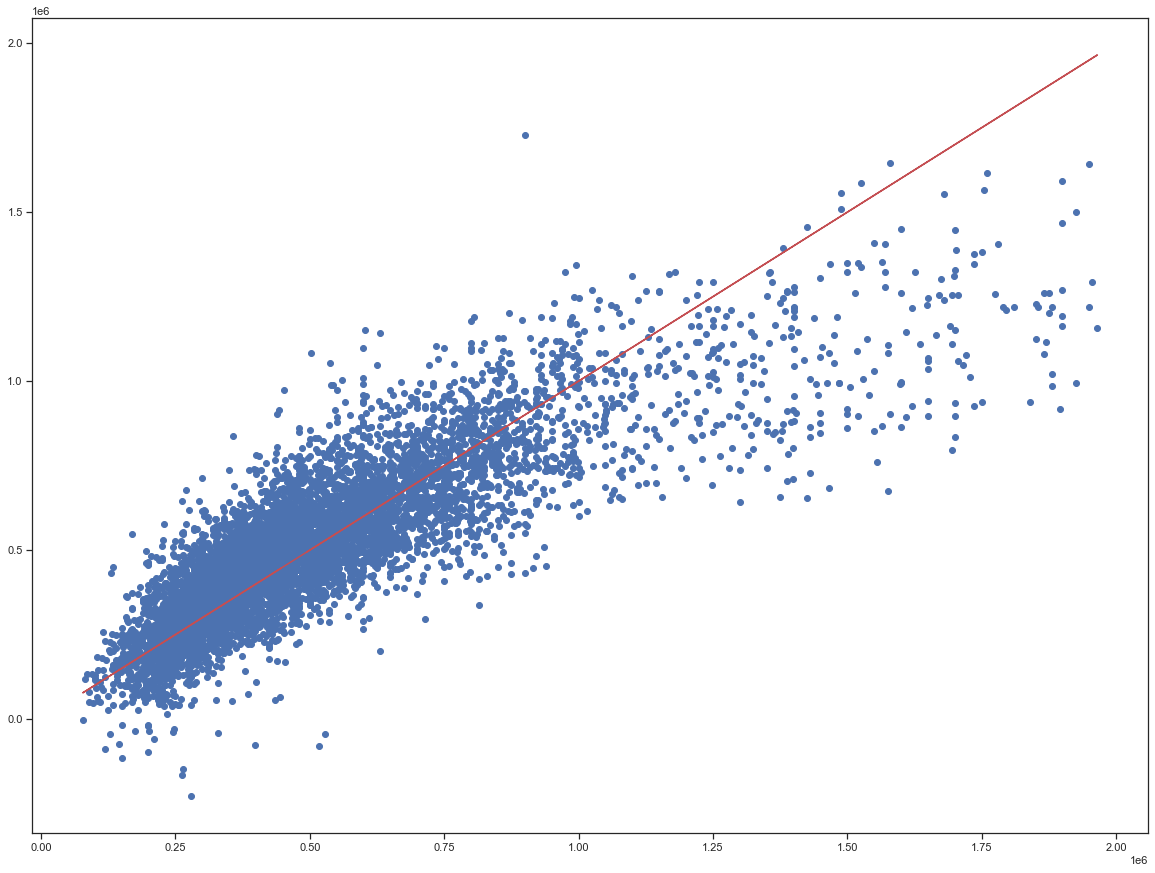

In [87]:
plt.figure(figsize= (20,15))
predictArray_lin = lin_reg.predict(x_test) #массив предсказанных значений
plt.scatter(y_test,predictArray_lin, color="b") #точками показываем предсказанные значения
plt.plot(y_test, y_test, color="r") #Прямая значений

# Decision Tree

Так как решающие деревья очень сильно переобучаются, придется потом потюнить эту модель. Но для первого шага просто применим и посмотрим на R2

In [88]:
from sklearn.tree import DecisionTreeRegressor
des_tree_reg = DecisionTreeRegressor(random_state=0)
des_tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [89]:
print(f'R² score: {r2_score(y_train, des_tree_reg.predict(x_train))*100}')

R² score: 99.99075050066232


Очевидный результат! Но на тестовых данных всё будет гораздо хуже

In [90]:
print(f'R² score: {r2_score(y_test, des_tree_reg.predict(x_test))*100}')

R² score: 75.22299323007465


Не прям плохо, но однозначно можно лучше 

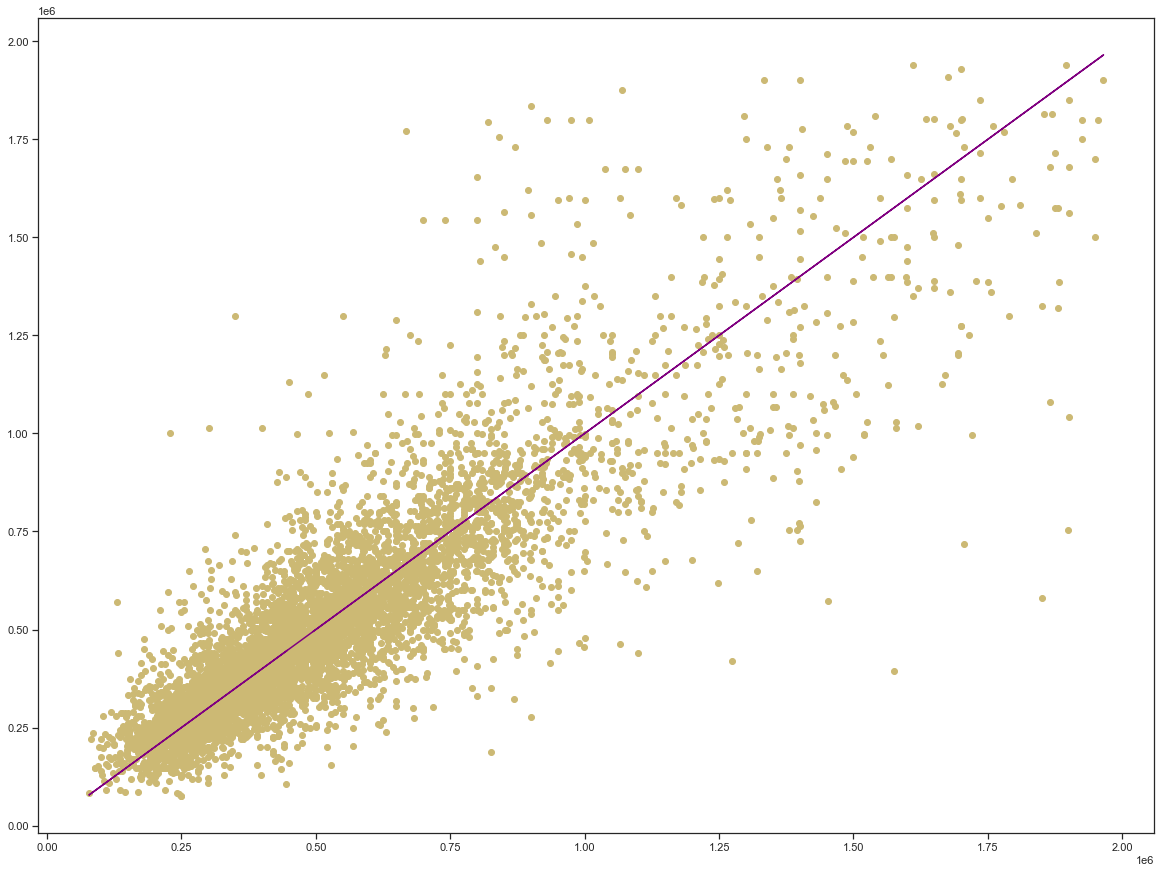

In [91]:
plt.figure(figsize= (20,15))
predictArray = des_tree_reg.predict(x_test)
plt.scatter(y_test, predictArray, color= 'y')
plt.plot(y_test, y_test, color = 'purple')

Подбираем лучшие параметры для дерева решений

In [92]:
params = { "max_depth" : [i for i in range(50)]}

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor()         
grid_search_cv_clf = GridSearchCV(clf, params, cv = 5)


In [93]:
grid_search_cv_clf.fit(x_train, y_train)

c:\python\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "c:\python\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn(some_fits_failed_message, FitFaile

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, ...]})

In [94]:
grid_search_cv_clf.best_params_

{'max_depth': 9}

In [95]:
print(f'R² score: {r2_score(y_test, grid_search_cv_clf.predict(x_test))*100}')

R² score: 79.09031262512572


Что ж, мы улучшили наш R2 score на 4%

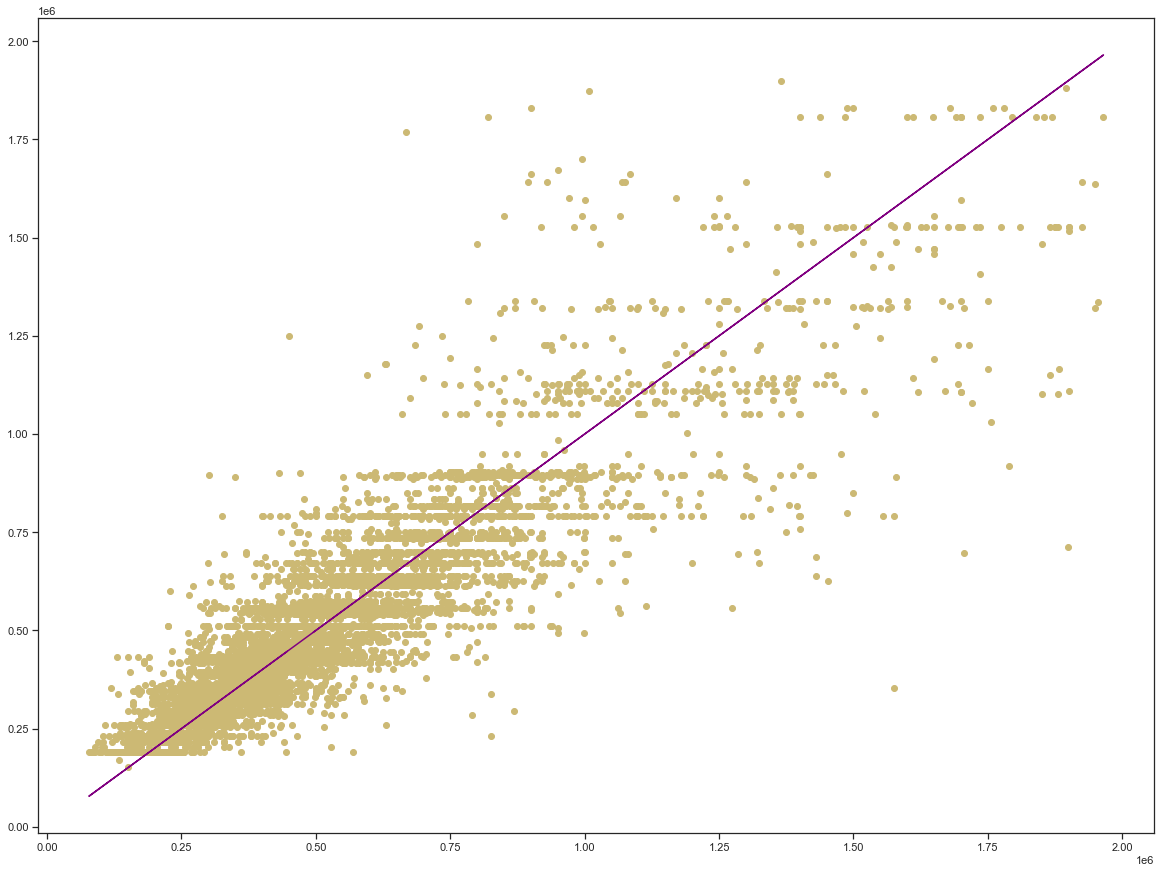

In [96]:
plt.figure(figsize= (20,15))
predictArray = grid_search_cv_clf.predict(x_test)
plt.scatter(y_test, predictArray, color= 'y')
plt.plot(y_test, y_test, color = 'purple')

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10 , random_state=0)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [98]:
print(f'R² score: {r2_score(y_train, rf_reg.predict(x_train))*100}')

R² score: 97.49506463074648


In [99]:
print(f'R² score: {r2_score(y_test, rf_reg.predict(x_test))*100}')

R² score: 86.45897270376224


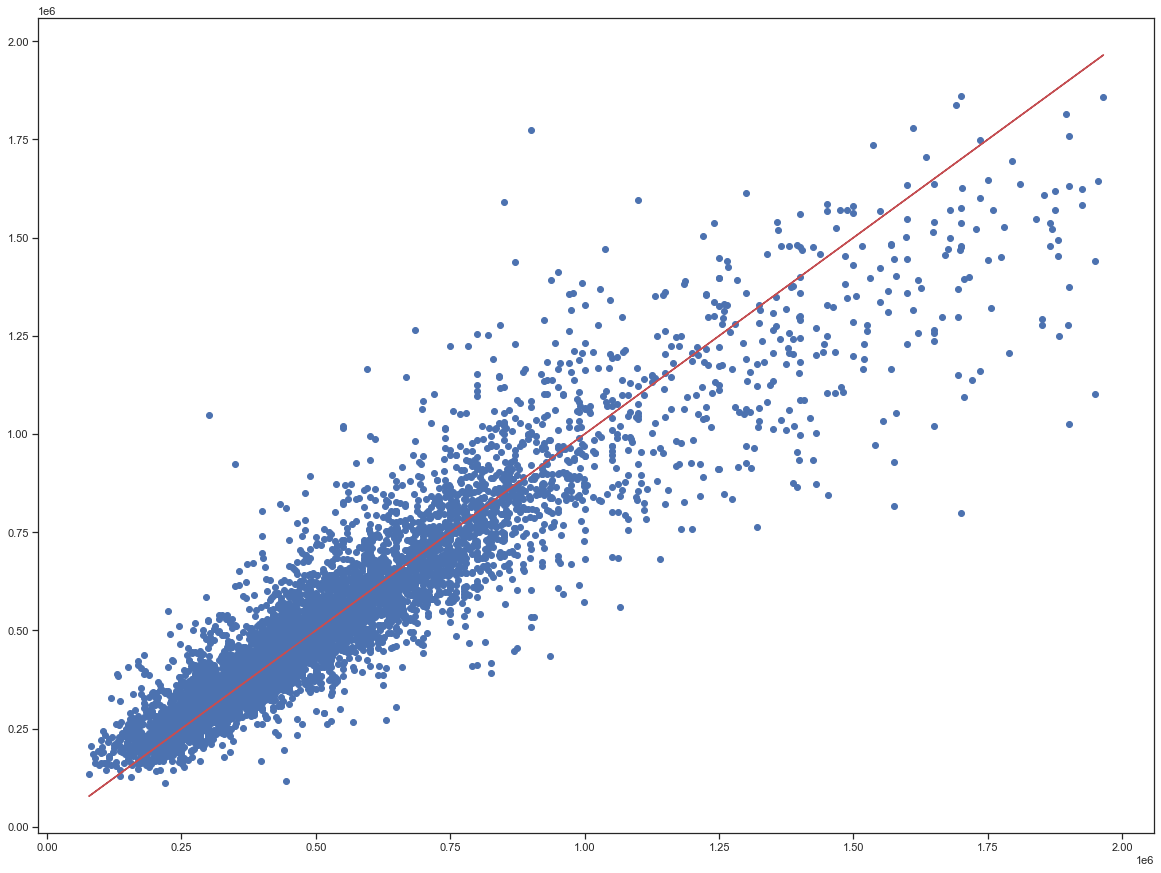

In [100]:
plt.figure(figsize= (20,15))
predictArray_rf = rf_reg.predict(x_test)
plt.scatter(y_test,predictArray_rf, color="b")
plt.plot(y_test, y_test, color = "r" )

Подбираем лучшие параметры для леса деревьев решений

In [101]:
params_rf = { "max_depth" : [i for i in range(50)],
            "n_estimators": [i for i in range(5)]}

In [102]:
clf_rf = RandomForestRegressor()
grid_search_cv_clf_rf = GridSearchCV(clf_rf, params_rf, cv = 5)

In [103]:
grid_search_cv_clf_rf.fit(x_train, y_train)

c:\python\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\lib\site-packages\sklearn\ensemble\_forest.py", line 384, in fit
    self._validate_estimator()
  File "c:\python\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater than zero, got 0.

-------------------------------------------

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, ...],
                         'n_estimators': [0, 1, 2, 3, 4]})

In [104]:
grid_search_cv_clf_rf.best_score_

0.8344001205184209

In [105]:
grid_search_cv_clf_rf.best_params_

{'max_depth': 14, 'n_estimators': 4}

In [106]:
print(f'R² score: {r2_score(y_test, grid_search_cv_clf_rf.predict(x_test))*100}')

R² score: 83.83647802087422


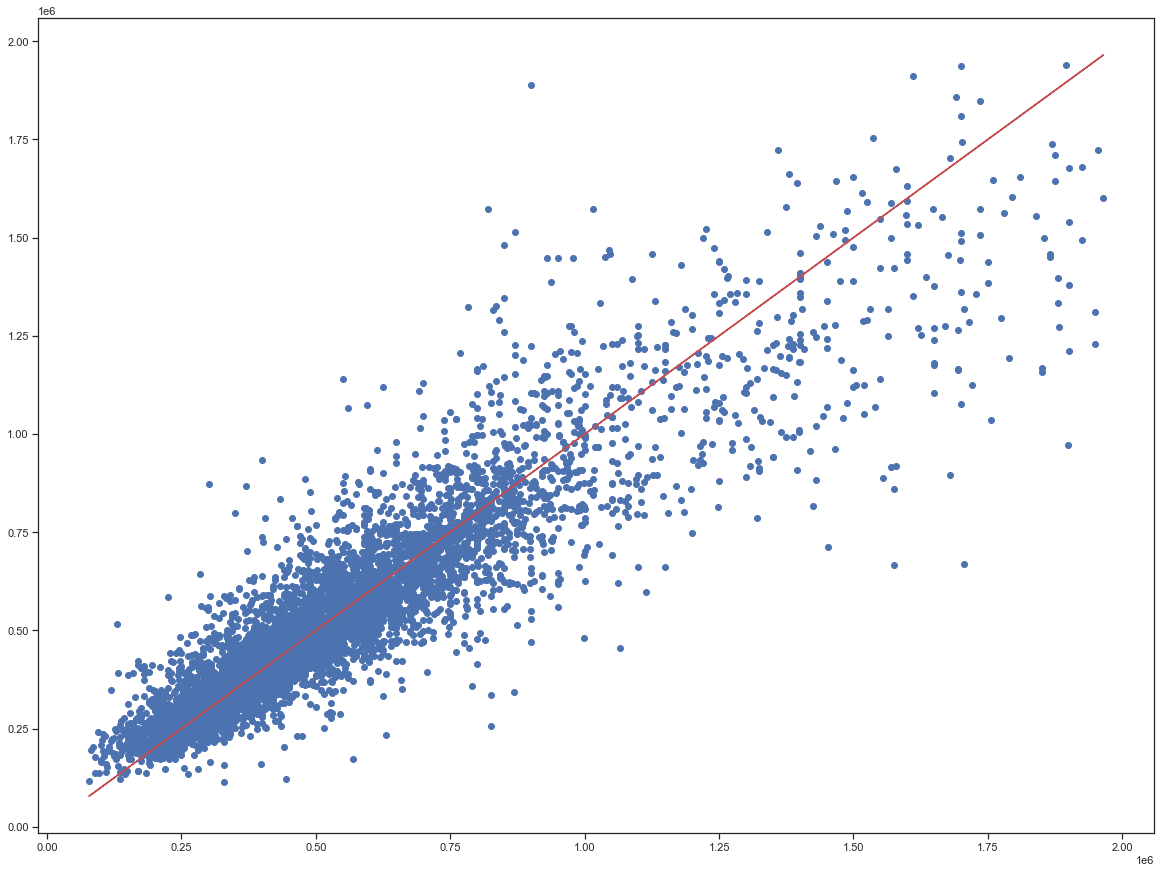

In [107]:
plt.figure(figsize= (20,15))

predictArray_rf = grid_search_cv_clf_rf.predict(x_test)
plt.scatter(y_test,predictArray_rf, color="b")
plt.plot(y_test, y_test, color = "r" )

# Вывод

Наибольший "R² score" был в случае, если для обучения мы использовали Random forest, а значит эта модель будет наилучшей